In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from DAFD.rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [58]:
# Load Dataset and sort
chips = pd.read_csv("20210212_designspace_JETTING.csv")
chips = chips.loc[chips["score"] != -1,:]
#chips = pd.read_csv("20210212_designspace_BOTHregimes.csv")

all_results = pd.read_csv("20210212_fullsweep.csv")
all_results = all_results.loc[all_results["regime"] == 2, :]
chips = chips.sort_values("score")

In [59]:
all_results

,Unnamed: 0,Unnamed: 0.1,aspect_ratio,capillary_number,expansion_ratio,flow_rate_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,size,rate,chip_num,regime
20,98,98,1.0,0.938889,2.0,22.000000,2.0,1.0,2.0,75,47.602833,663.688599,0,2
22,83,83,1.0,0.383333,2.0,19.777778,2.0,1.0,2.0,75,40.070805,357.898682,0,2
23,84,84,1.0,0.494444,2.0,19.777778,2.0,1.0,2.0,75,41.428108,415.594360,0,2
24,85,85,1.0,0.605556,2.0,19.777778,2.0,1.0,2.0,75,42.785408,473.004486,0,2
25,86,86,1.0,0.716667,2.0,19.777778,2.0,1.0,2.0,75,44.022129,527.526123,0,2
26,87,87,1.0,0.827778,2.0,19.777778,2.0,1.0,2.0,75,45.254063,582.047729,0,2
27,88,88,1.0,0.938889,2.0,19.777778,2.0,1.0,2.0,75,49.086140,636.569275,0,2
28,99,99,1.0,1.050000,2.0,22.000000,2.0,1.0,2.0,75,52.698402,718.210205,0,2
29,89,89,1.0,1.050000,2.0,19.777778,2.0,1.0,2.0,75,53.909222,691.090820,0,2
32,93,93,1.0,0.383333,2.0,22.000000,2.0,1.0,2.0,75,38.172379,383.088470,0,2


LOWEST 1087.786534
HIGHEST 61221.153403


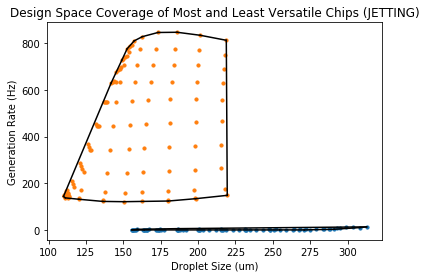

In [61]:
highest_results = all_results.loc[all_results["chip_num"]==chips.iloc[-1, 0], :]
lowest_results = all_results.loc[all_results["chip_num"]==chips.iloc[0, 0], :]

print("LOWEST %f" % chips.head(1)["score"])
print("HIGHEST %f" % chips.tail(1)["score"])


for x in [lowest_results, highest_results]:
    sizes = x["size"].tolist()
    rates = x["rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plt.title("Design Space Coverage of Most and Least Versatile Chips (JETTING)")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
plt.savefig("VersatilityExtremes_Compare.png")

In [63]:
chips.tail(1).to_dict()

{'Unnamed: 0': {21399: 21399},
 'Unnamed: 0.1': {21399: 21399},
 'aspect_ratio': {21399: 3.0},
 'expansion_ratio': {21399: 2.0},
 'normalized_oil_inlet': {21399: 4.0},
 'normalized_orifice_length': {21399: 3.0},
 'normalized_water_inlet': {21399: 2.0},
 'orifice_size': {21399: 150},
 'score': {21399: 61221.15340321023},
 'size_score': {21399: 109.4923858642578},
 'rate_score': {21399: 726.5197219848633}}

*Main Effect Analysis*

In [64]:
'''STEPS:
1) Find mean of all results.
2) Across each collection of values used (have code from before). Take mean of each at every checkpoint 
3) Plot out main effect plots for each
'''

'STEPS:\n1) Find mean of all results.\n2) Across each collection of values used (have code from before). Take mean of each at every checkpoint \n3) Plot out main effect plots for each\n'

In [65]:
mean_size = all_results["size"].mean()
mean_rate = all_results["rate"].mean()


In [66]:
size_normalized = (all_results["size"]/all_results["orifice_size"])
mean_size_normalized = size_normalized.mean()

In [67]:
mean_score = chips["score"].mean()
mean_size_score = chips["size_score"].mean()
mean_rate_score = chips["rate_score"].mean()

In [68]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = all_results[col].unique()
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(chips.loc[chips[col] == val, "size_score"].mean())
        rate_score_avgs.append(chips.loc[chips[col] == val, "rate_score"].mean())
        score_avgs.append(chips.loc[chips[col] == val, "score"].mean())
    #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "size_score_avgs": size_score_avgs, "rate_score_avgs": rate_score_avgs, "score_avgs": score_avgs}
        

In [78]:
pd.DataFrame(meff_vals['orifice_size']).T

,0,1,2,3,4
range,75.000000,100.000000,125.000000,150.000000,175.000000
size_score_avgs,86.003120,102.653028,116.755432,123.475066,123.064588
rate_score_avgs,281.670619,257.370324,233.651154,211.130244,190.094821
score_avgs,16925.785993,18235.346056,18857.179185,17975.993280,16047.288877


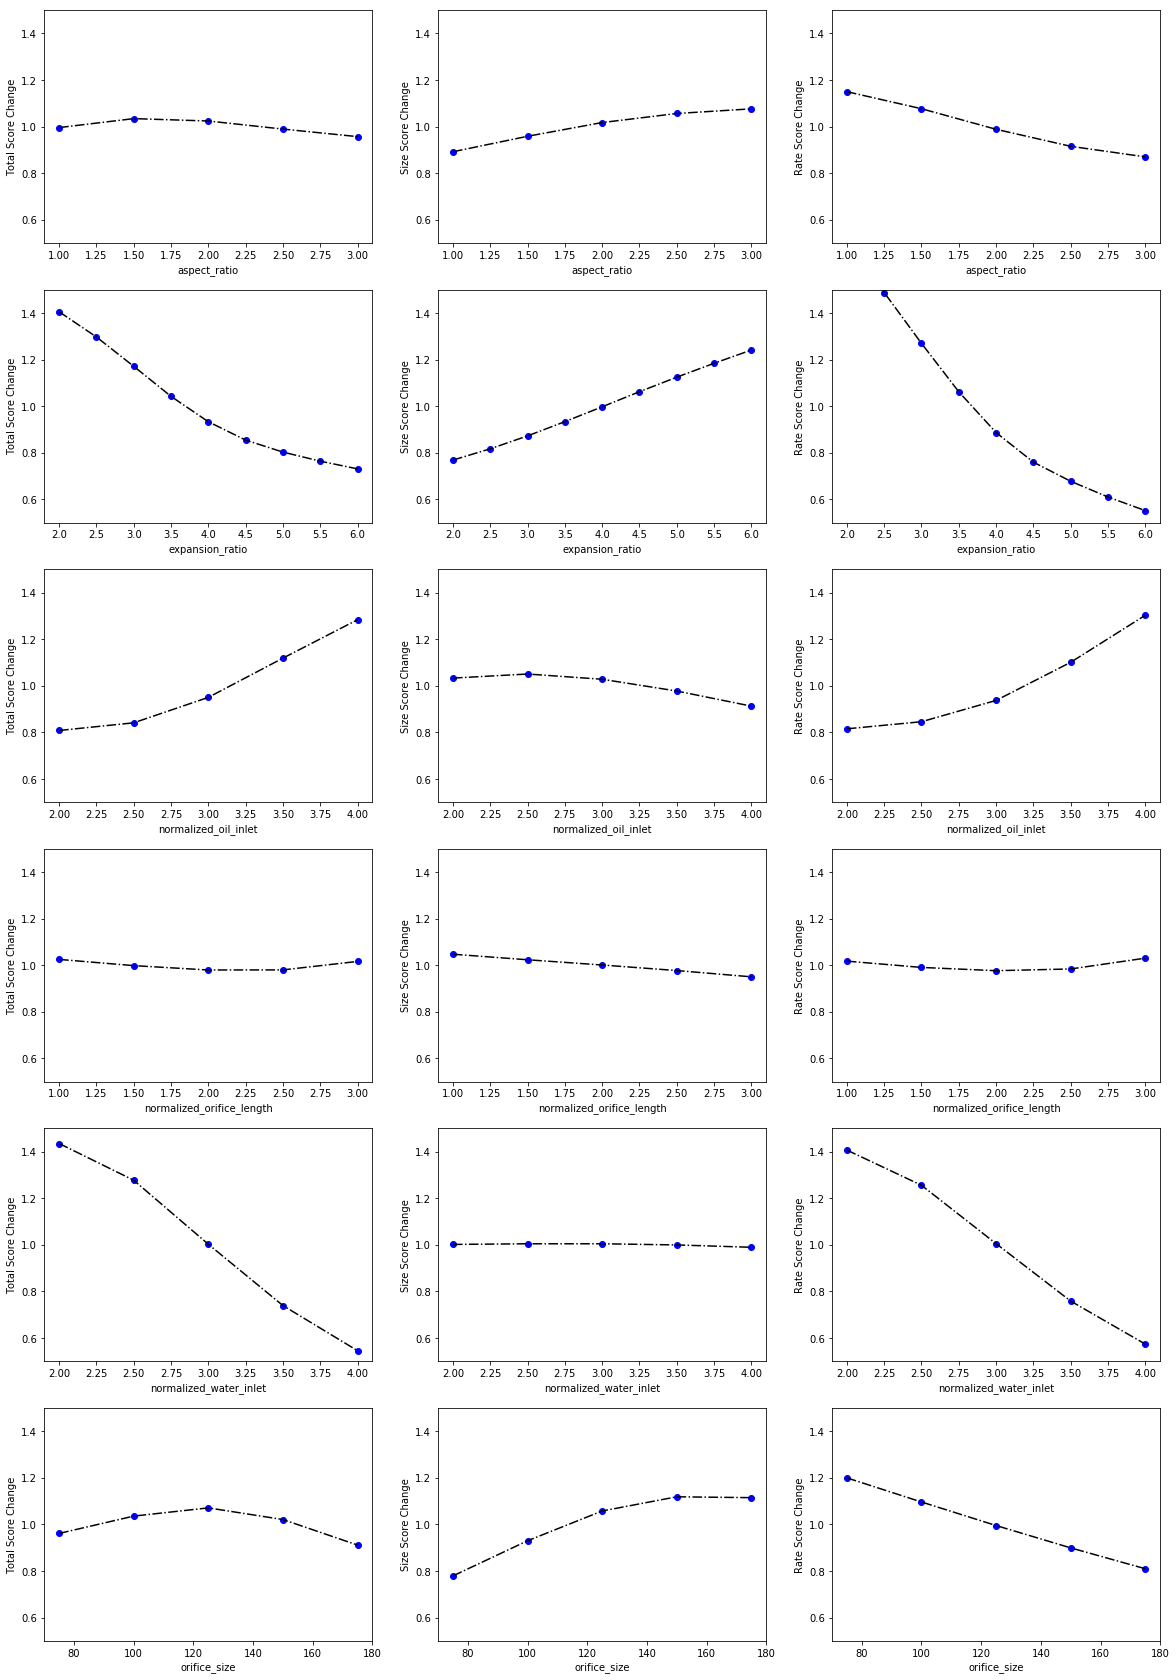

In [70]:
fig, axs = plt.subplots(6,3, figsize=[20,30])
for i, param in enumerate(meff_vals.keys()):
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_score_avgs"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_score_avgs"]/mean_rate_score
    
    axs[i][0].plot(param_range, score_normed, "bo")
    axs[i][0].plot(param_range, score_normed, "k-.")
    
    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0.5, 1.5])
        
    axs[i][1].plot(param_range, size_score_normed, "bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    
    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0.5, 1.5])
    
    axs[i][2].plot(param_range, rate_score_normed, "bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0.5, 1.5])
    
plt.savefig('MainEffectAnalysis_versatility_values.png')

In [87]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0241E668>,
      dtype=object)